<a href="https://colab.research.google.com/github/PizzaOy/About-me-Page-using-HTML/blob/main/ACM_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running on GPU
Tesla T4


100%|██████████| 170M/170M [00:16<00:00, 10.1MB/s]


Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10
Files already downloaded and verified
torch.Size([3, 32, 32])


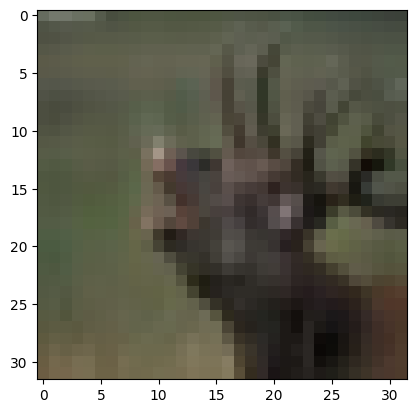

torch.Size([1, 10])
Epoch: 1


0it [00:00, ?it/s]

End of epoch loss: 1.345


0it [00:00, ?it/s]

End of epoch accuracy: 46.14%
tensor(4, device='cuda:0')
Guess: bird | Label: deer


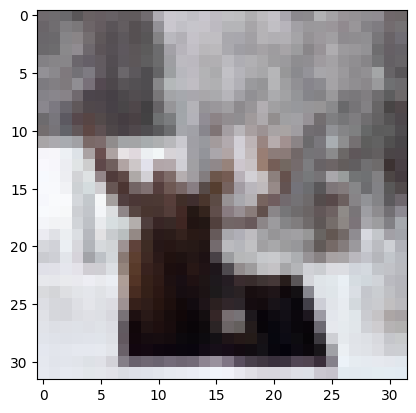

tensor(6, device='cuda:0')
Guess: car | Label: frog


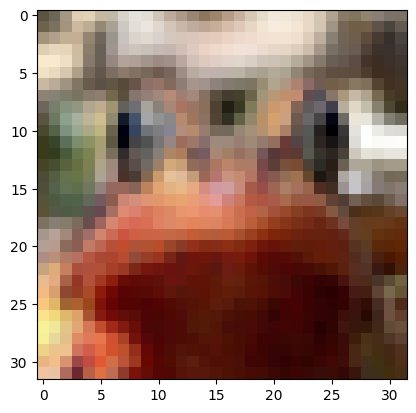

tensor(1, device='cuda:0')
Guess: car | Label: car


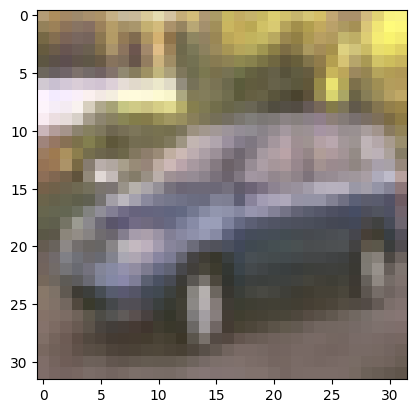

tensor(6, device='cuda:0')
Guess: frog | Label: frog


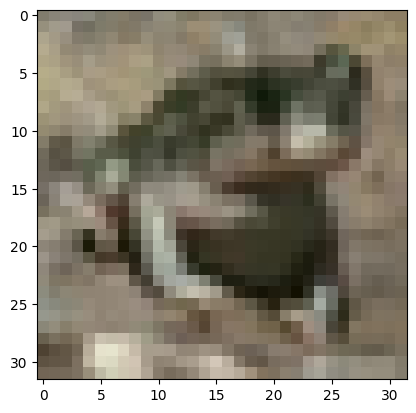

tensor(3, device='cuda:0')
Guess: frog | Label: cat


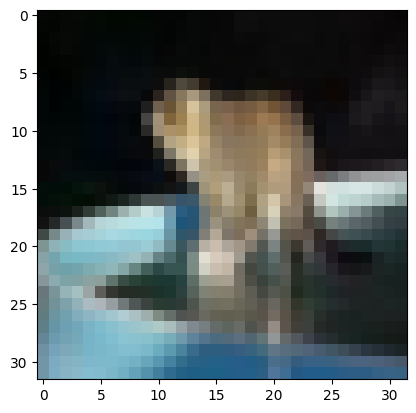

tensor(2, device='cuda:0')
Guess: frog | Label: bird


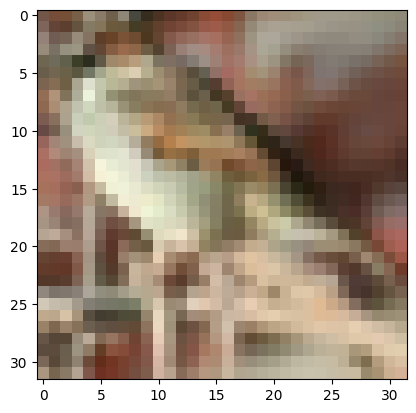

tensor(5, device='cuda:0')
Guess: frog | Label: dog


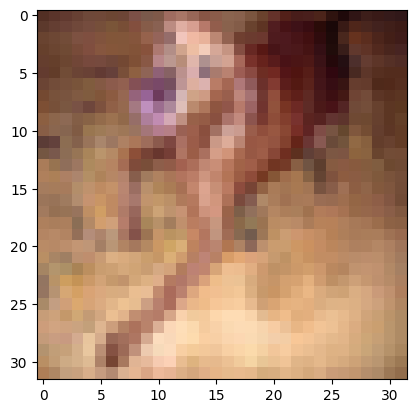

tensor(9, device='cuda:0')
Guess: truck | Label: truck


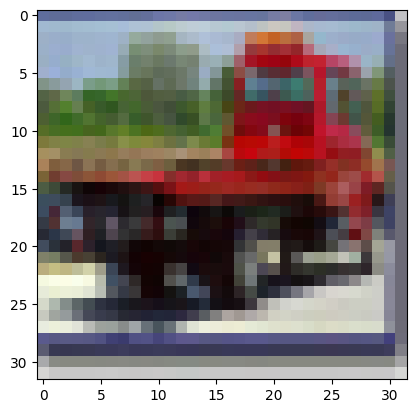

Epoch: 2


0it [00:00, ?it/s]

End of epoch loss: 0.811


0it [00:00, ?it/s]

End of epoch accuracy: 57.29%
tensor(5, device='cuda:0')
Guess: deer | Label: dog


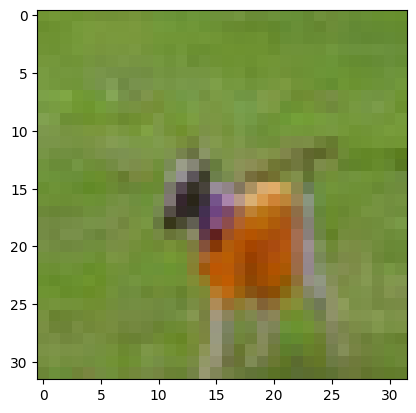

tensor(9, device='cuda:0')
Guess: truck | Label: truck


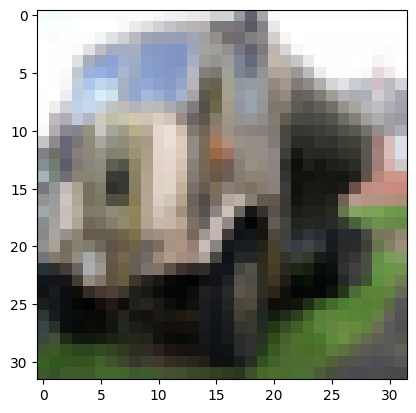

tensor(9, device='cuda:0')
Guess: truck | Label: truck


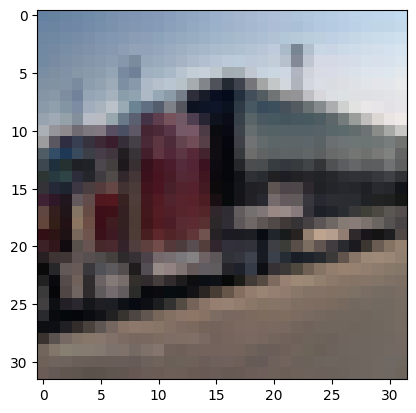

tensor(8, device='cuda:0')
Guess: ship | Label: ship


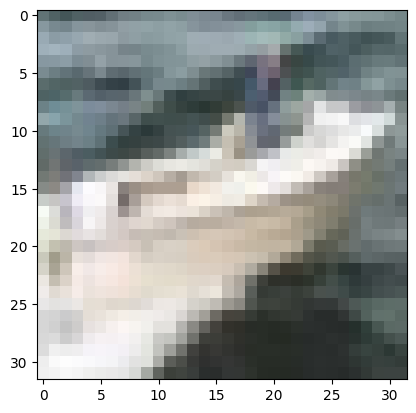

tensor(5, device='cuda:0')
Guess: frog | Label: dog


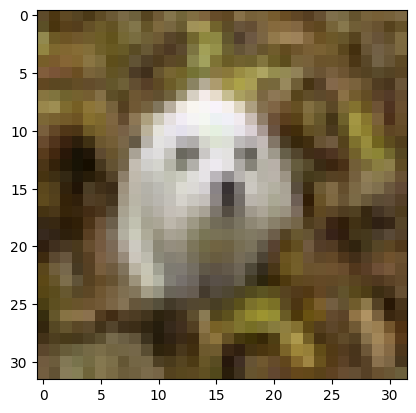

tensor(6, device='cuda:0')
Guess: frog | Label: frog


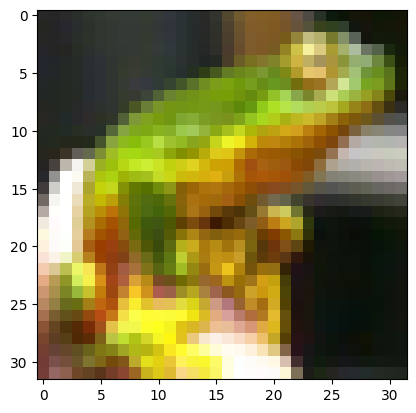

tensor(0, device='cuda:0')
Guess: plane | Label: plane


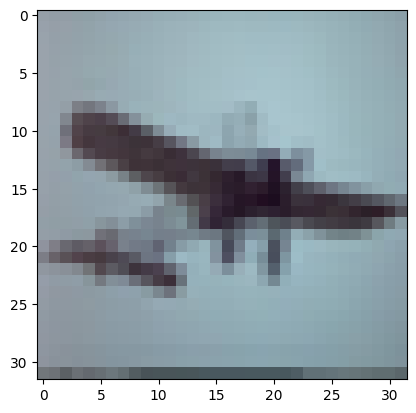

tensor(2, device='cuda:0')
Guess: bird | Label: bird


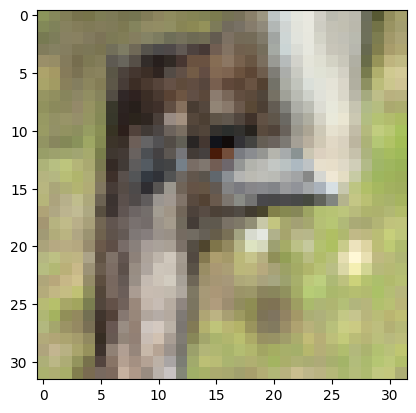

Epoch: 3


0it [00:00, ?it/s]

End of epoch loss: 0.951


0it [00:00, ?it/s]

End of epoch accuracy: 63.84%
tensor(6, device='cuda:0')
Guess: frog | Label: frog


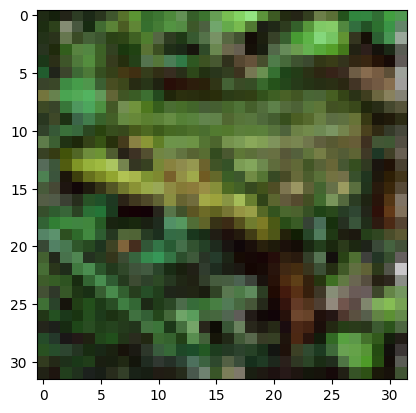

tensor(0, device='cuda:0')
Guess: ship | Label: plane


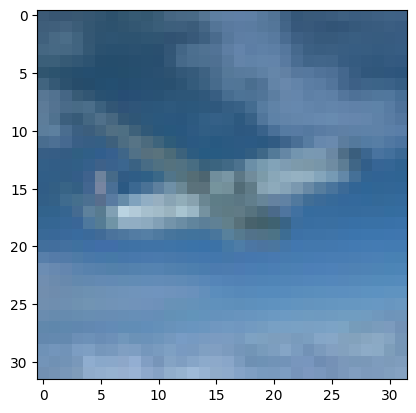

tensor(7, device='cuda:0')
Guess: horse | Label: horse


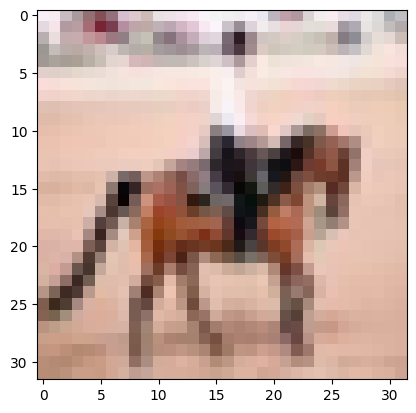

tensor(6, device='cuda:0')
Guess: frog | Label: frog


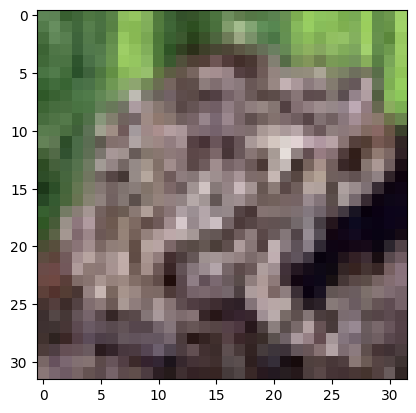

tensor(3, device='cuda:0')
Guess: frog | Label: cat


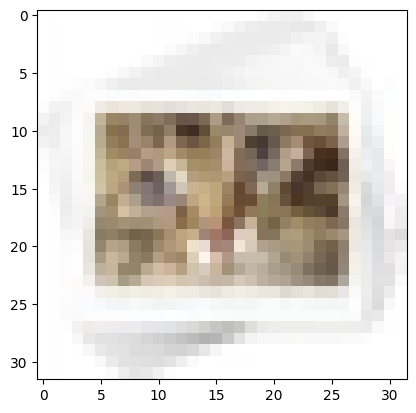

tensor(7, device='cuda:0')
Guess: cat | Label: horse


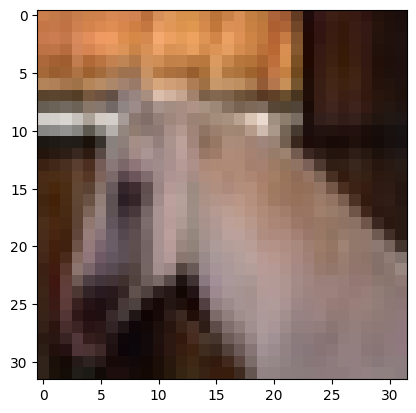

tensor(8, device='cuda:0')
Guess: deer | Label: ship


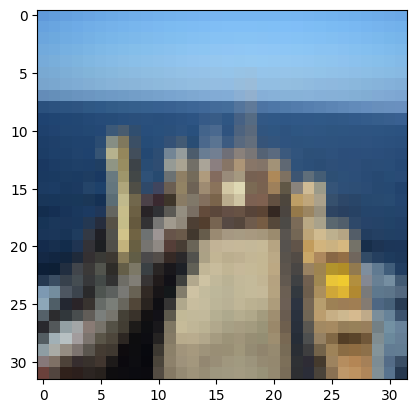

tensor(8, device='cuda:0')
Guess: ship | Label: ship


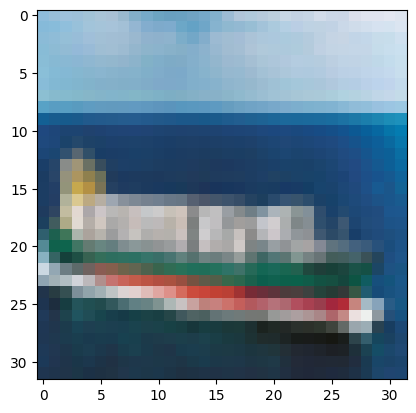

Epoch: 4


0it [00:00, ?it/s]

KeyboardInterrupt: 

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F

from tqdm.notebook import tqdm

if torch.cuda.is_available(): # Checks if CUDA is availiable, loads the device for computation to the GPU
    device = torch.device('cuda:0')
    print('Running on GPU')
    print(torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
    print('Running on CPU')



train_dataset = torchvision.datasets.CIFAR10(root='./cifar10', transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./cifar10', train=False, transform=torchvision.transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, 128, shuffle=True) # instance of the DataLoader class, iterable over a dataset
test_loader = torch.utils.data.DataLoader(test_dataset, 128, shuffle=True)

train_iter = iter(train_loader)
batch_images, batch_labels = next(train_iter)

image, label = batch_images[0], batch_labels[0]
print(image.shape)
plt.imshow(image.permute(1,2,0))
plt.show()


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1, stride=2)  # b x 3 x 32 x 32 -> b x 32 x 16 x 16
        self.batchnorm1 = nn.BatchNorm2d(32)                               # (channel x height x width), b is batch size
        self.relu1 = nn.ReLU()  # Using ReLU activation function
        self.dropout1 = nn.Dropout(0.1)  # Adding dropout to prevent overfitting

        # Second convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1, stride=2)  # b x 32 x 16 x 16 -> b x 64 x 8 x 8
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2,2)  # Adding a pooling layer to reduce spatial dimensions, b x 64 x 8 x 8 -> b x 64 x 4 x 4
        self.dropout2 = nn.Dropout(0.05)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)  # b x 64 x 4 x 4 -> b x 64 x 4 x 4.    #why stride DNE?
        self.batchnorm3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.05)
        self.flatten = nn.Flatten()  # b x 64 x 4 x 4 -> b x (64 * 4 * 4)

        # Fully connected layer - classifying the features into 10 classes
        self.fc = nn.Linear(64 * 4 * 4, 128)  # 64 from the last conv layer, 10 for the number of classes, b x (64 * 4 * 4) -> b x 128
        self.relu4 =  nn.ReLU()
        self.fc1 = nn.Linear(128, 10)  # b x 128 -> b x 10


    def forward(self, x):
        # Describing the forward pass through the network

            x = self.conv1(x)
            x = self.batchnorm1(x)
            x = self.relu1(x)
            x = self.dropout1(x)
            x = self.conv2(x)
            x = self.batchnorm2(x)
            x = self.relu2(x)
            x = self.pool2(x)
            x = self.dropout2(x)

            x = self.conv3(x)
            x = self.batchnorm3(x)
            x = self.relu3(x)
            x = self.dropout3(x)

            x = self.flatten(x)  # Flattening the output of the conv layers for the fully connected layer
            x = self.fc(x)
            x = self.relu4(x)
            x = self.fc1(x)
            return x  # The softmax (or another activation) can be implicitly applied by the loss function

model = CNN()
model.to(device)

random_tensor = torch.randn(1, 3, 32, 32).to(device)
print(model(random_tensor).shape)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003, weight_decay=1e-5)

criterion = nn.CrossEntropyLoss();

optimizer = torch.optim.Adam(model.parameters(), lr = 0.003, weight_decay = 1e-5)


def train_one_epoch(model, train_loader, optimizer, criterion, device):
  model.train()
  for i, batch in tqdm(enumerate(train_loader)):
    inputs, labels = batch
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  print('End of epoch loss:', round(loss.item(), 3))

def test(model, test_loader, device):

  classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

  model.eval()
  correct = 0
  predictions = []
  labels = []
  for i, batch in tqdm(enumerate(test_loader)):
    inputs, labels = batch
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    predictions = outputs.argmax(dim =1)
    correct += (predictions == labels).sum().item()

  print(f"End of epoch accuracy: {100 * correct/ len(test_dataset)}%")


  for i in range(min(len(inputs), 8)):
    print(labels[i])
    print('Guess:', classes[predictions[i]], '| Label:', classes[labels[i]])
    plt.imshow(inputs[i].to('cpu').permute(1,2,0))
    plt.show()

NUM_EPOCHS = 10

for epoch in range(NUM_EPOCHS):
  print('Epoch:', epoch + 1)
  train_one_epoch(model, train_loader, optimizer, criterion, device)
  test(model, test_loader, device)

torch.save(model.state_dict(), "model.pth")

model_new = CNN()
model_new.load_state_dict(torch.load("model.pth"))
model_new.to(device)
model_new.eval()

